# Explore Unsupervised ML

In [28]:
#Kmeans algorithm using formula 

In [29]:
#lets start 

#In stage 1 :
#     we select k-cluster centroids randomly .
#       --> loading the dataset.
#       --> select column and target.
#       --> put the centroids in dictionary.
#      --> visualised the dataset,centroids.

#Stage 2:
#    Assign each point to its nearest centroid cluster.
#	--> create the assignment function.
#	--> will add centroids_column and closest column corresponding color column
#	--> visualised the updated data.

#Stage 3:
#    Update centroids of each cluster by taking the mean of cluster point of that cluster.
#	--> update function.
#	--> visualised the updated data.

#Stage 4 :
#    Repeat the 2 and 3 until there's no change in cluster(df['closest'])	

#Stage 5 : Final Result
#	-->visualization of final dataset.

In [30]:
# import the  dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn import datasets

In [31]:
#stage 1

In [32]:
#load the built-in data in sklearn
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
print(iris);


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [34]:
#sepal length = x,sepal width =y
df = pd.DataFrame({
    'x' : iris.data[:,0],
    'y' : iris.data[:,1],
    'cluster' : iris.target
})

In [35]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [36]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i ]['x'].mean()) #i is 0 and there mean()
    result_list.append(df.loc[df['cluster'] == i ]['y'].mean())
    
    centroids[i] = result_list

In [37]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

Text(0, 0.5, 'Sepal Width')

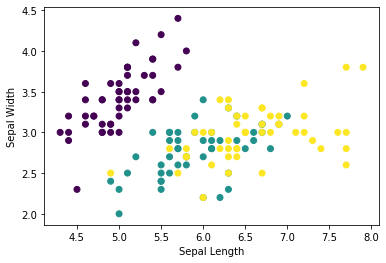

In [38]:
#visualization the dataset
plt.scatter(df['x'],df['y'],c = iris.target) #c is color 
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

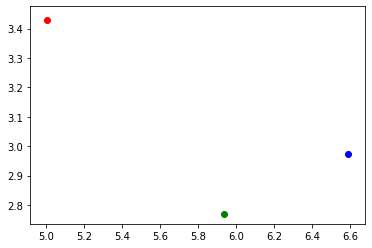

In [39]:
#lets use the centroids 
# firstly add color to each select centriods
centroids_col = {0 :'r',1 : 'g', 2 : 'b'}

for i in range(3): #centroids.keys()
    plt.scatter (centroids[i][0],centroids[i][1], color = centroids_col[i]);

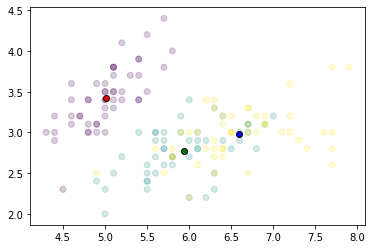

In [10]:
#now merger the centroids with dataset
plt.scatter(df['x'],df['y'],c = iris.target, alpha = 0.2)

colmap = {0 :'r',1 : 'g', 2 : 'b'}
#col = [0,1]
for i in centroids.keys():
    plt.scatter (centroids[i][0],centroids[i][1], c= centroids_col[i] ,edgecolor = 'k');

In [11]:
#stage 2 

In [12]:
# to find the distance between and updating the data 
def assignment(df, centroids):
    for i in range(3):
        #sqrt((x1 - x2)**2 + (y1 - y2)**2) x2,y2 are centroids
        
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2  
                 + ( df['y'] - centroids[i][1]) ** 2))
                                            
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #we have 3 points to from point and then take the closest point
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1)
    #so in closest columns we will taken only int
    df['closest'] = df['closest'].map(lambda x : int(x.lstrip('distance_from')))
    #then each int (0 =r..) value will have seperate color
    df['color'] = df['closest'].map (lambda x  : centroids_col[x])
    return df

In [13]:
df = assignment(df,centroids)

In [14]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


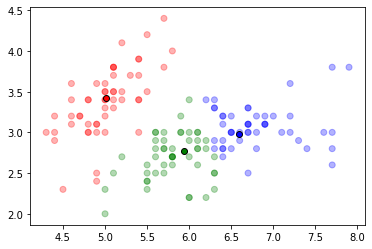

In [15]:
#visualization of cluster
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.3)
for i in centroids.keys():
    plt.scatter (*centroids[i], color = centroids_col[i] ,edgecolor = 'k');


In [16]:
#stage 3

In [17]:
#updating the centroids

def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
        return k 
        
    

In [18]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

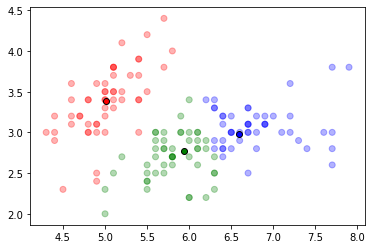

In [19]:
#visualization of update centroids
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.3)
for i in centroids.keys():
    plt.scatter (*centroids[i], color = colmap[i] ,edgecolor = 'k');

In [20]:
#trying for another centroids
#repeat the assignment stage and resign the pints
df =  assignment(df,centroids)

In [21]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.147942,1.109863,1.578233,0,r
1,4.9,3.0,0,0.398346,1.061224,1.688200,0,r
2,4.7,3.2,0,0.359507,1.308662,1.901478,0,r
3,4.6,3.1,0,0.497731,1.376153,1.991989,0,r
4,5.0,3.6,0,0.217186,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.733412,0.797870,0.114978,2,b
146,6.3,2.5,2,1.563740,0.453206,0.554635,1,g
147,6.5,3.0,2,1.538990,0.609094,0.091761,2,b
148,6.2,3.4,2,1.190687,0.683078,0.576212,2,b


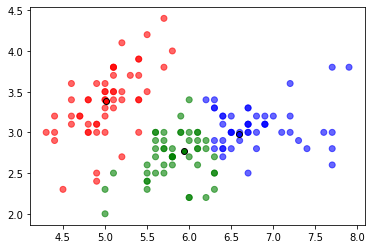

In [22]:
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.6)
for i in centroids.keys():
    plt.scatter (centroids[i][0], centroids[i][1], color = colmap[i] ,edgecolor = 'k');

In [23]:
#stage 4

In [24]:
#this continue until cluster doesn't change close (closest column)

while True:
    closest_centroids = df['closest'].copy(deep =True) #Copy the centroids update in variable
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

In [25]:
#stage 5

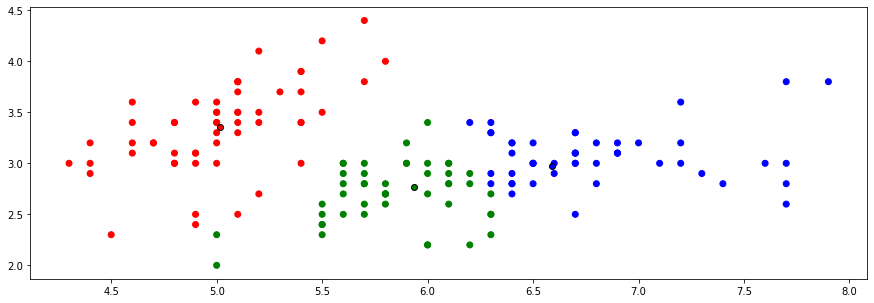

In [26]:
#final result
fig = plt.figure(figsize=(15,5))
plt.scatter(df['x'],df['y'], color = df['color'])
for i in centroids.keys():
    plt.scatter (*centroids[i], color = colmap[i] ,edgecolor = 'k');